In [1]:
# import packages 

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import classification_report, roc_curve, auc, confusion_matrix, cohen_kappa_score, matthews_corrcoef
from sklearn.preprocessing import StandardScaler, label_binarize, LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, learning_curve
from sklearn import model_selection
from sklearn import metrics
from yellowbrick.classifier import ClassificationReport
from mlxtend.plotting import plot_decision_regions
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap
from scipy import stats
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input/n-back-main-23'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/n-back-main-23/main_test.csv


In [2]:

# load data
data = pd.read_csv('/kaggle/input/n-back-main-23/main_test.csv')

In [3]:
# display data
data.head()

,Rx1 - Tx1 O2Hb,Rx1 - Tx1 HHb,Rx1 - Tx2 O2Hb,Rx1 - Tx2 HHb,Rx1 - Tx3 O2Hb,Rx1 - Tx3 HHb,Rx1 - Tx4 O2Hb,Rx1 - Tx4 HHb,Rx2 - Tx5 O2Hb,Rx2 - Tx5 HHb,Rx2 - Tx6 O2Hb,Rx2 - Tx6 HHb,Rx2 - Tx7 O2Hb,Rx2 - Tx7 HHb,Rx2 - Tx8 O2Hb,Rx2 - Tx8 HHb,Type
0,120.52,73.98,117.1,73.32,120.52,75.06,120.82,77.14,117.58,72.9,115.56,72.62,122.51,76.27,112.43,75.71,1-back
1,120.52,73.98,117.1,73.32,120.52,75.06,120.82,77.14,117.58,72.9,115.56,72.62,122.51,76.27,112.43,75.71,1-back
2,120.52,73.98,117.1,73.32,120.52,75.06,120.82,77.14,117.58,72.9,115.56,72.62,122.51,76.27,112.43,75.71,1-back
3,120.52,73.98,117.1,73.32,120.52,75.06,120.82,77.14,117.58,72.9,115.56,72.62,122.51,76.27,112.43,75.71,1-back
4,120.52,73.98,117.1,73.32,120.52,75.06,120.82,77.14,117.58,72.9,115.56,72.62,122.51,76.27,112.43,75.71,1-back


In [4]:
# basic statistics
data.describe()

,Rx1 - Tx1 O2Hb,Rx1 - Tx1 HHb,Rx1 - Tx2 O2Hb,Rx1 - Tx2 HHb,Rx1 - Tx3 O2Hb,Rx1 - Tx3 HHb,Rx1 - Tx4 O2Hb,Rx1 - Tx4 HHb,Rx2 - Tx5 O2Hb,Rx2 - Tx5 HHb,Rx2 - Tx6 O2Hb,Rx2 - Tx6 HHb,Rx2 - Tx7 O2Hb,Rx2 - Tx7 HHb,Rx2 - Tx8 O2Hb,Rx2 - Tx8 HHb
count,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000,321909.000000
mean,-274.504541,-166.677761,-252.597819,-164.423482,-276.747691,-170.930452,-278.741189,-170.691635,-274.392466,-168.301590,-268.033373,-167.232082,-269.572361,-164.226102,-235.080524,-163.057594
std,2227.819059,1342.297921,2050.448501,1322.112420,2244.650595,1376.216269,2258.547703,1372.009062,2227.767745,1355.761705,2176.643788,1347.613440,2178.198011,1320.083592,1914.077103,1315.490013
min,-27418.200000,-16521.880000,-25235.010000,-16273.740000,-27625.680000,-16939.440000,-27797.150000,-16888.090000,-27417.370000,-16687.500000,-26788.130000,-16587.140000,-26809.140000,-16248.760000,-23555.530000,-16191.330000
25%,-0.260000,-1.200000,-0.140000,-0.970000,-0.160000,-0.970000,-0.480000,-1.290000,-0.150000,-0.860000,0.010000,-0.870000,-0.680000,-1.150000,0.040000,-0.760000
50%,0.940000,-0.390000,1.030000,-0.530000,0.710000,-0.460000,1.110000,-0.510000,0.940000,-0.380000,1.310000,-0.270000,0.640000,-0.490000,1.380000,-0.320000
75%,2.380000,0.000000,2.540000,-0.250000,1.960000,-0.100000,2.190000,-0.120000,2.240000,0.000000,2.460000,0.020000,1.590000,-0.080000,2.250000,0.000000
max,131.770000,78.480000,119.800000,75.670000,129.380000,79.440000,132.700000,81.330000,125.940000,78.040000,124.530000,73.660000,131.560000,80.930000,115.960000,78.270000


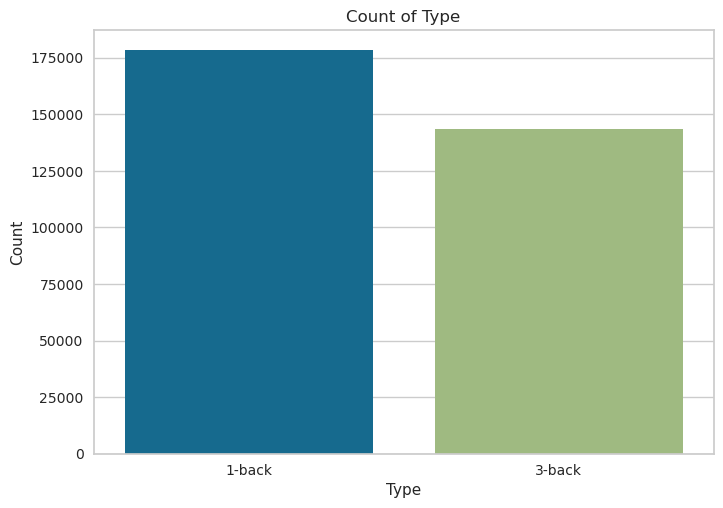

In [5]:
sns.countplot(data=data, x='Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.title('Count of Type')
plt.show()


In [6]:
# Extract only HHb readings from the 'data' DataFrame
dataHonly = data.iloc[:, [1, 3, 5, 7, 9, 11, 13, 15]]
dataHonly.head()

,Rx1 - Tx1 HHb,Rx1 - Tx2 HHb,Rx1 - Tx3 HHb,Rx1 - Tx4 HHb,Rx2 - Tx5 HHb,Rx2 - Tx6 HHb,Rx2 - Tx7 HHb,Rx2 - Tx8 HHb
0,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71
1,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71
2,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71
3,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71
4,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71


In [7]:
#extract O2 data 
dataO2only = data.iloc[:, 0:-1:2] #only O2Hb ratings
dataO2only.head()

,Rx1 - Tx1 O2Hb,Rx1 - Tx2 O2Hb,Rx1 - Tx3 O2Hb,Rx1 - Tx4 O2Hb,Rx2 - Tx5 O2Hb,Rx2 - Tx6 O2Hb,Rx2 - Tx7 O2Hb,Rx2 - Tx8 O2Hb
0,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43
1,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43
2,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43
3,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43
4,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43


In [8]:
#attempt to get rid of outliers
def remove_outliers(df, z_threshold=1.5):
    # Calculate the absolute z-score for each column
    z_scores = stats.zscore(df, axis=0, nan_policy='omit')
    
    # Check if any of the z-scores exceed the threshold in any row
    is_outlier_row = (abs(z_scores) > z_threshold).any(axis=1)
    
    # Filter out rows that have any outlier in the columns
    df_cleaned = df[~is_outlier_row]
    
    return df_cleaned
  
# Remove rows containing any outlier in the HHb readings for the smaller dataset
dataHonly_cleaned = remove_outliers(dataHonly)
dataHonly_cleaned_type = pd.concat([dataHonly_cleaned,data.iloc[:, -1:]], axis=1)

dataHonly_cleaned_type.head()

,Rx1 - Tx1 HHb,Rx1 - Tx2 HHb,Rx1 - Tx3 HHb,Rx1 - Tx4 HHb,Rx2 - Tx5 HHb,Rx2 - Tx6 HHb,Rx2 - Tx7 HHb,Rx2 - Tx8 HHb,Type
0,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71,1-back
1,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71,1-back
2,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71,1-back
3,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71,1-back
4,73.98,73.32,75.06,77.14,72.9,72.62,76.27,75.71,1-back


In [9]:

dataO2only_cleaned = remove_outliers(dataO2only)
dataO2only_cleaned_type = pd.concat([dataO2only_cleaned,data.iloc[:, -1:]], axis=1)

dataO2only_cleaned_type.head()

,Rx1 - Tx1 O2Hb,Rx1 - Tx2 O2Hb,Rx1 - Tx3 O2Hb,Rx1 - Tx4 O2Hb,Rx2 - Tx5 O2Hb,Rx2 - Tx6 O2Hb,Rx2 - Tx7 O2Hb,Rx2 - Tx8 O2Hb,Type
0,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43,1-back
1,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43,1-back
2,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43,1-back
3,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43,1-back
4,120.52,117.1,120.52,120.82,117.58,115.56,122.51,112.43,1-back


Correlation Matrix

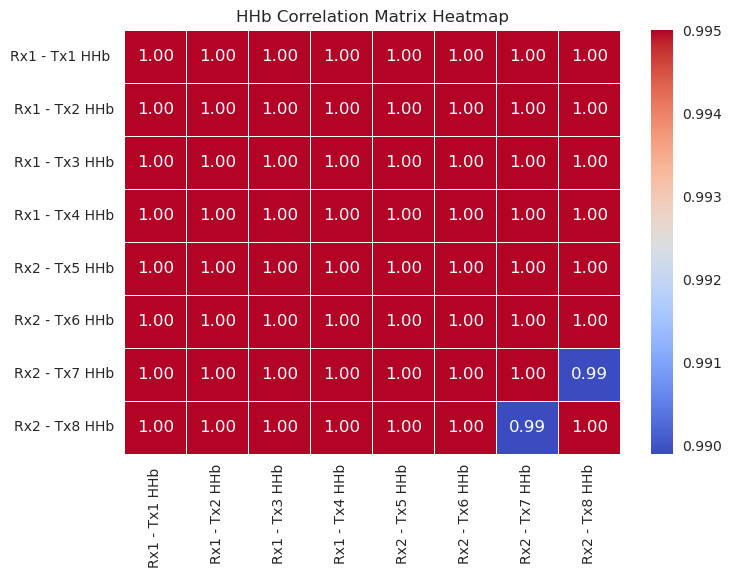

In [10]:
# Calculate the correlation matrix for HHb readings
corr_n_backHonly =  dataHonly_cleaned.corr()

# Create a heatmap to visualize the correlation matrix
sns.heatmap(corr_n_backHonly, vmin=None, vmax=0.995, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("HHb Correlation Matrix Heatmap")
plt.show()

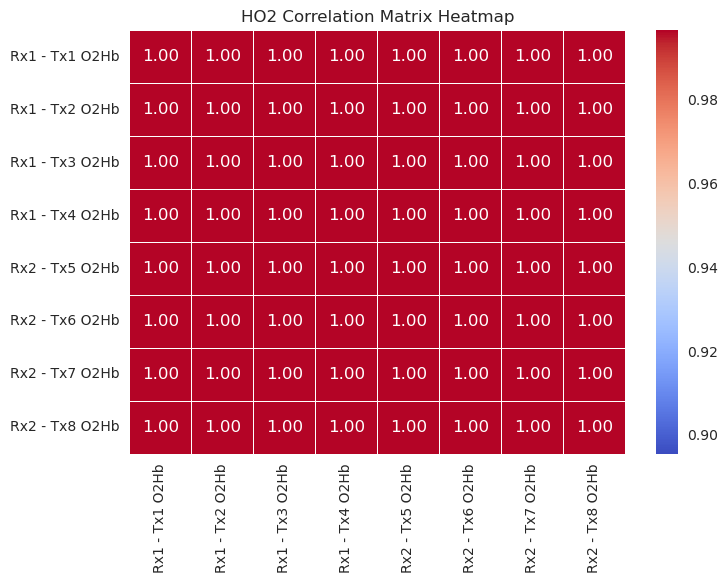

In [11]:
corr_n_backO2only = dataO2only_cleaned.corr()
sns.heatmap(corr_n_backO2only, vmin=None,vmax=0.995, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("HO2 Correlation Matrix Heatmap")
plt.show()

In [12]:
data = pd.concat([dataO2only_cleaned, dataHonly_cleaned], axis = 1)
data.describe()

,Rx1 - Tx1 O2Hb,Rx1 - Tx2 O2Hb,Rx1 - Tx3 O2Hb,Rx1 - Tx4 O2Hb,Rx2 - Tx5 O2Hb,Rx2 - Tx6 O2Hb,Rx2 - Tx7 O2Hb,Rx2 - Tx8 O2Hb,Rx1 - Tx1 HHb,Rx1 - Tx2 HHb,Rx1 - Tx3 HHb,Rx1 - Tx4 HHb,Rx2 - Tx5 HHb,Rx2 - Tx6 HHb,Rx2 - Tx7 HHb,Rx2 - Tx8 HHb
count,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000,316291.000000
mean,-3.739123,-3.388672,-3.937443,-4.242816,-3.632792,-3.487198,-4.840684,-2.445588,-3.541113,-3.740226,-3.671321,-3.944773,-3.528019,-3.448712,-3.790495,-3.178699
std,108.501134,99.883055,109.305243,109.980175,108.507260,106.007832,106.098801,93.495882,65.359470,64.351663,66.970656,66.771207,65.990329,65.586000,64.410333,64.206666
min,-3614.530000,-3327.020000,-3641.750000,-3664.320000,-3614.490000,-3531.470000,-3534.430000,-3105.480000,-2177.970000,-2145.390000,-2233.040000,-2226.240000,-2199.890000,-2186.630000,-2142.100000,-2134.510000
25%,-0.230000,-0.050000,-0.085000,-0.330000,-0.060000,0.090000,-0.540000,0.160000,-1.110000,-0.930000,-0.930000,-1.220000,-0.830000,-0.830000,-1.080000,-0.740000
50%,1.000000,1.080000,0.740000,1.150000,0.980000,1.360000,0.670000,1.410000,-0.370000,-0.520000,-0.460000,-0.510000,-0.360000,-0.260000,-0.490000,-0.310000
75%,2.420000,2.550000,1.990000,2.210000,2.270000,2.490000,1.610000,2.280000,0.000000,-0.240000,-0.090000,-0.110000,0.010000,0.020000,-0.070000,0.000000
max,131.770000,119.800000,129.380000,132.700000,125.940000,124.530000,131.560000,115.960000,78.480000,75.670000,79.440000,81.330000,78.040000,73.660000,80.930000,78.270000


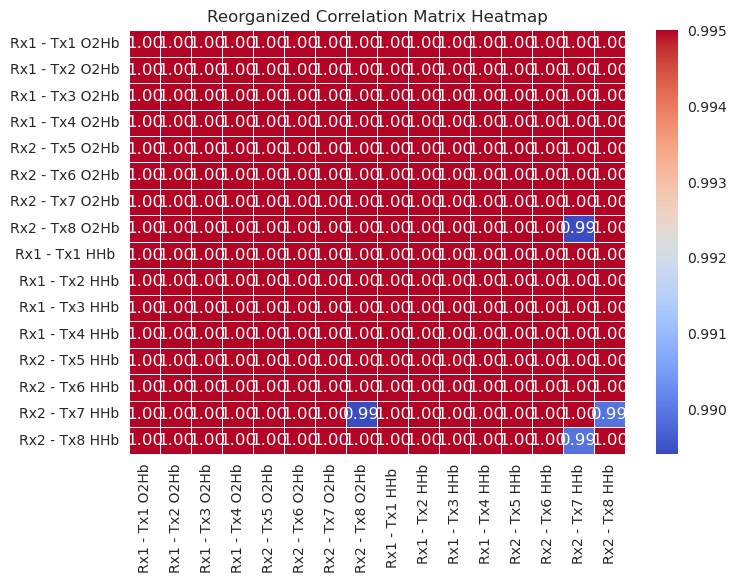

In [13]:
corr_n_back = data.corr()
sns.heatmap(corr_n_back, vmin=None, vmax=0.995, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Reorganized Correlation Matrix Heatmap")
plt.show()

In [14]:
featuresO2 = dataO2only_cleaned_type.columns[:]
print(featuresO2)

Index(['Rx1 - Tx1 O2Hb', 'Rx1 - Tx2 O2Hb', 'Rx1 - Tx3 O2Hb', 'Rx1 - Tx4 O2Hb',
       'Rx2 - Tx5 O2Hb', 'Rx2 - Tx6 O2Hb', 'Rx2 - Tx7 O2Hb', 'Rx2 - Tx8 O2Hb',
       'Type'],
      dtype='object')


In [15]:
featuresH = dataHonly_cleaned_type.columns[:]
print(featuresH)

Index(['Rx1 - Tx1 HHb ', 'Rx1 - Tx2 HHb', 'Rx1 - Tx3 HHb', 'Rx1 - Tx4 HHb',
       'Rx2 - Tx5 HHb', 'Rx2 - Tx6 HHb', 'Rx2 - Tx7 HHb', 'Rx2 - Tx8 HHb',
       'Type'],
      dtype='object')


In [16]:
data_small_O2 = dataO2only_cleaned_type.iloc[::75,:]
data_small_O2.head()

,Rx1 - Tx1 O2Hb,Rx1 - Tx2 O2Hb,Rx1 - Tx3 O2Hb,Rx1 - Tx4 O2Hb,Rx2 - Tx5 O2Hb,Rx2 - Tx6 O2Hb,Rx2 - Tx7 O2Hb,Rx2 - Tx8 O2Hb,Type
0,120.52,117.10,120.52,120.82,117.58,115.56,122.51,112.43,1-back
75,-0.67,-0.95,-0.58,-0.78,-0.51,-0.79,-0.62,-0.84,1-back
150,-0.18,-0.14,0.42,0.44,0.16,0.61,-0.09,-0.15,1-back
225,-0.46,-0.49,0.48,0.18,0.38,0.11,-0.35,-0.05,1-back
300,-0.25,0.07,0.49,1.18,0.93,0.98,0.18,0.51,1-back


In [17]:
data_small_H = dataHonly_cleaned_type.iloc[::75, :]
data_small_H.head()

,Rx1 - Tx1 HHb,Rx1 - Tx2 HHb,Rx1 - Tx3 HHb,Rx1 - Tx4 HHb,Rx2 - Tx5 HHb,Rx2 - Tx6 HHb,Rx2 - Tx7 HHb,Rx2 - Tx8 HHb,Type
0,73.98,73.32,75.06,77.14,72.90,72.62,76.27,75.71,1-back
75,0.08,-0.08,-0.03,-0.05,0.00,-0.04,0.10,-0.03,1-back
150,0.35,0.15,0.11,0.16,0.18,0.23,0.51,0.32,1-back
225,0.40,0.10,0.12,0.11,0.21,0.15,0.56,0.19,1-back
300,0.46,0.18,0.14,0.40,0.28,0.27,0.60,0.13,1-back


In [18]:
#commenting this cell out for timing reasons
#def swarm_plots(data_in):
    #featuresO2 = data_in.columns[:-1]  # Exclude the last column ('Type') (will create all of the swarm plots)
    #features = data_in.columns[0:2] # Use only the first two columns (will only create two swarm plots)
    
    #nback_colors = {'1-back': 'blue', '3-back': 'orange'}

    #for feature in featuresO2:
    #plt.figure()
       # sns.swarmplot(data=data_in, x='Type', y=feature, palette=nback_colors.values())
      #  plt.xlabel('Type')
       # plt.ylabel(feature)
        #plt.title(f'Swarm Plot of {feature}')
      #  plt.show()

# Call the function to generate swarm plots for each feature
#swarm_plots(data_small_O2)

In [19]:

# Swarm plot deoxy
#swarm_plots(data_small_H)

In [20]:
# Load data
df = pd.read_csv('/kaggle/input/n-back-main-23/main_test.csv')

#remove outliers
data = remove_outliers(data)

In [21]:
# Preprocessing
df['Type'] = pd.factorize(df["Type"])[0] # convert species to numerical

# Split data into features (X) and target (y)
X = df.drop(columns=['Type'])

# Label encode target
encoder = LabelEncoder()
y = encoder.fit_transform(df['Type'])

In [22]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Hyperparameter tuning
param_grid = {'solver': ['svd', 'lsqr', 'eigen'],
              'tol': [0.0001, 0.0002, 0.0003]}

lda = LinearDiscriminantAnalysis()

grid_search = GridSearchCV(estimator=lda, param_grid=param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters: ", grid_search.best_params_)

Best Parameters:  {'solver': 'svd', 'tol': 0.0003}


In [24]:
# Fit the model with best parameters
lda = LinearDiscriminantAnalysis(solver=grid_search.best_params_['solver'], tol=grid_search.best_params_['tol'])
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis(tol=0.0003)

              precision    recall  f1-score   support

           0       0.73      0.90      0.81     35759
           1       0.82      0.59      0.69     28623

    accuracy                           0.76     64382
   macro avg       0.78      0.74      0.75     64382
weighted avg       0.77      0.76      0.75     64382



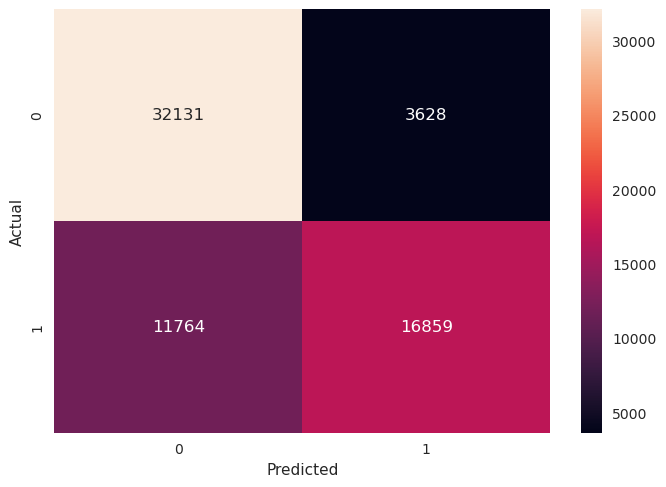

In [25]:
# Make predictions
y_pred = lda.predict(X_test)

# Model evaluation
print(classification_report(y_test, y_pred))
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=lda.classes_, yticklabels=lda.classes_)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

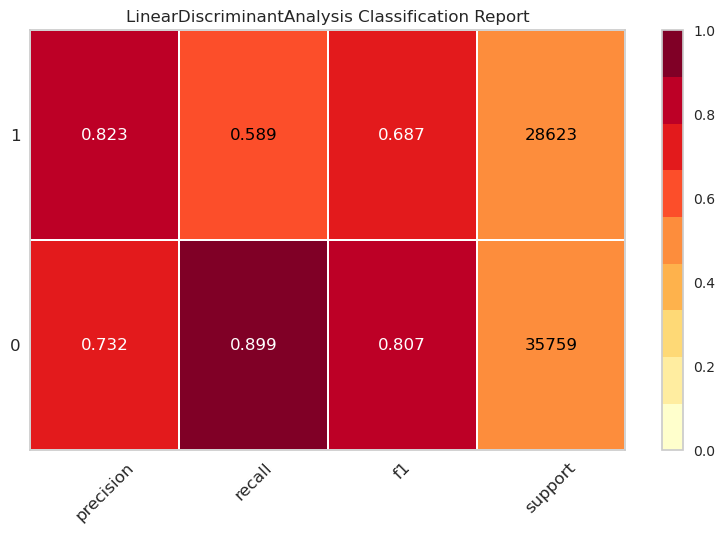

<Axes: title={'center': 'LinearDiscriminantAnalysis Classification Report'}>

In [26]:
# Visualizing with Classification Report
visualizer = ClassificationReport(lda, support=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()

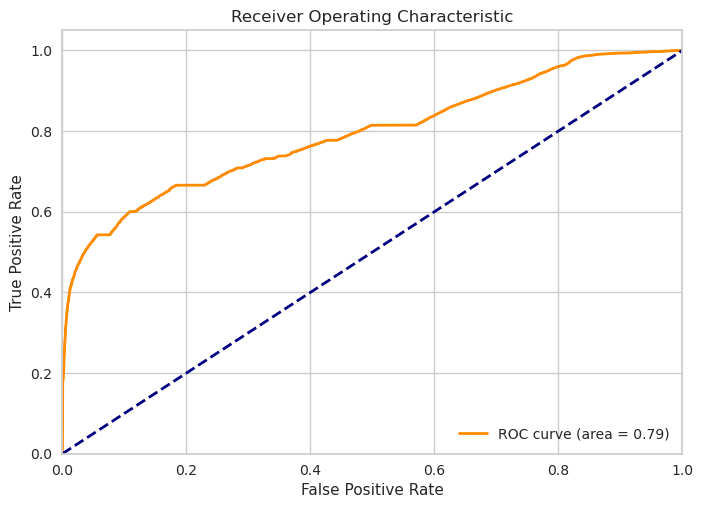

In [27]:
# Get predicted probabilities
y_probs = lda.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

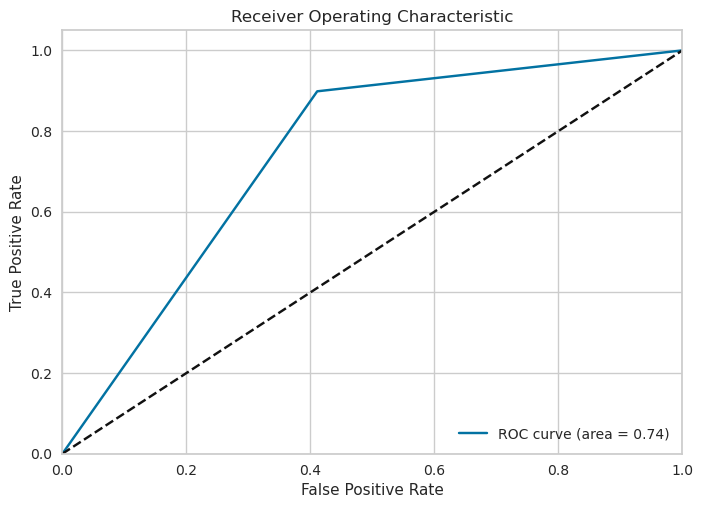

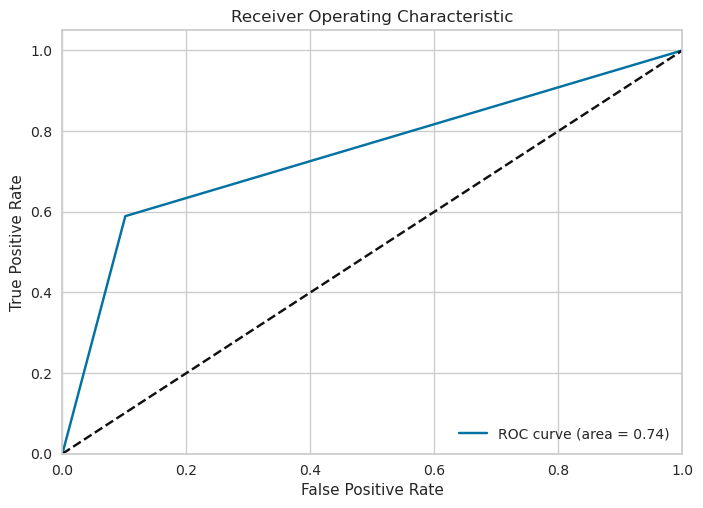

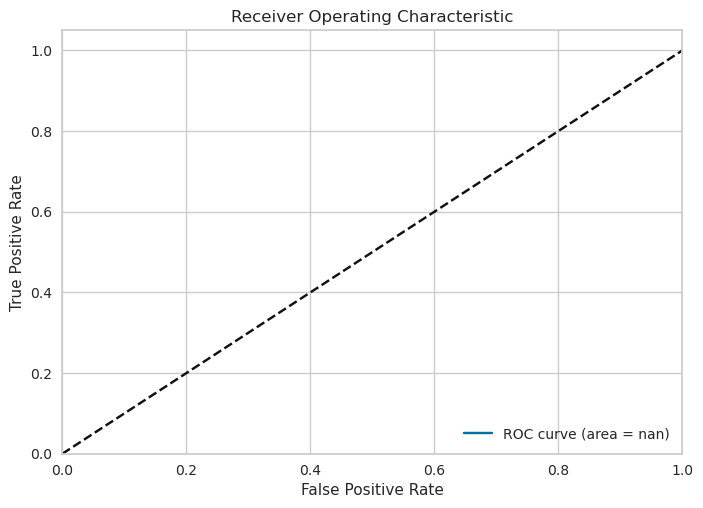

In [28]:
# ROC curve
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_pred_binarized = label_binarize(y_pred, classes=[0, 1, 2])
n_classes = y_test_binarized.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_pred_binarized[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
for i in range(n_classes):
    plt.figure()
    plt.plot(fpr[i], tpr[i], label='ROC curve (area = %0.2f)' % roc_auc[i])
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc="lower right")
    plt.show()

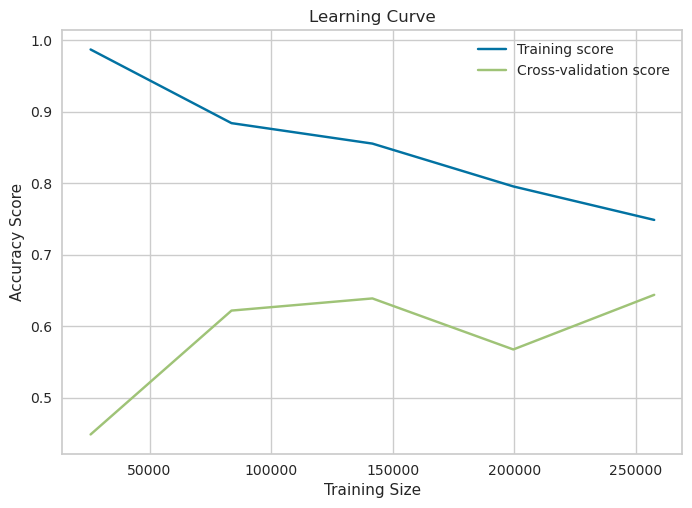

In [29]:
# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(lda, X, y, cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)

plt.plot(train_sizes, train_scores_mean, label='Training score')
plt.plot(train_sizes, test_scores_mean, label='Cross-validation score')
plt.title('Learning Curve')
plt.xlabel('Training Size')
plt.ylabel('Accuracy Score')
plt.legend(loc='best')
plt.show()